# 7.2.VGGNet_from_Scratch

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Creando el modelo

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from imutils import paths
import numpy as np
import os

In [3]:
img_size = 224
path_train = 'data_' + str(img_size) + '/train'
path_validation = 'data_' + str(img_size) + '/validation'

In [4]:
imagePaths_train = list(paths.list_images(path_train))
imagePaths_validation = list(paths.list_images(path_validation))
classNames = [pt.split(os.path.sep)[-2] for pt in imagePaths_train]
classNames = [str(x) for x in np.unique(classNames)]

print("etiquetas del entrenamiento")
print(classNames)

#Códificando las etiquetas en númerops
print("codificando etiquetas")
le = LabelEncoder()
classNames_ids = le.fit_transform(classNames)
print(classNames_ids)

etiquetas del entrenamiento
['10', '100', '20', '200', '50']
codificando etiquetas
[0 1 2 3 4]


In [35]:
model = Sequential()

# block 1
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# block 2
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# block 4
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# block 5
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# block 6
model.add(Flatten())
model.add(Dense(4096, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# block 7
model.add(Dense(2048, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# classifier
model.add(Dense(len(classNames), activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_48 (Batc (None, 222, 222, 64)      256       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
batch_normalization_49 (Batc (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 108, 108, 128)    

# Entrenamiento

In [36]:
batch_size = 32

In [37]:
aug_train = ImageDataGenerator(rescale=1. / 255)
train_generator = aug_train.flow_from_directory(path_train,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size)

Found 2240 images belonging to 5 classes.


In [38]:
aug_validation = ImageDataGenerator(rescale=1. / 255)
validation_generator = aug_validation.flow_from_directory(path_validation,
                                                          target_size=(img_size, img_size),
                                                          batch_size=batch_size)

Found 2671 images belonging to 5 classes.


In [39]:
optimizer = SGD(learning_rate=0.0001, momentum=0.9)

loss = 'categorical_crossentropy'
metrics=["accuracy"]

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

In [40]:
epochs = 30

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              validation_data=validation_generator,
                              epochs = epochs,
                              #callbacks=callbacks,
                              verbose = 1)

Epoch 1/30
70/70 [==============================] - 22s 310ms/step - loss: 1.6095 - accuracy: 0.1937 - val_loss: 1.6094 - val_accuracy: 0.2186
Epoch 2/30
70/70 [==============================] - 22s 311ms/step - loss: 1.6095 - accuracy: 0.1960 - val_loss: 1.6094 - val_accuracy: 0.1786
Epoch 3/30
70/70 [==============================] - 22s 308ms/step - loss: 1.6095 - accuracy: 0.1915 - val_loss: 1.6094 - val_accuracy: 0.1816
Epoch 4/30
70/70 [==============================] - 22s 310ms/step - loss: 1.6095 - accuracy: 0.1911 - val_loss: 1.6094 - val_accuracy: 0.1786
Epoch 5/30
70/70 [==============================] - 21s 307ms/step - loss: 1.6095 - accuracy: 0.1942 - val_loss: 1.6094 - val_accuracy: 0.2029
Epoch 6/30
70/70 [==============================] - 21s 304ms/step - loss: 1.6094 - accuracy: 0.1973 - val_loss: 1.6094 - val_accuracy: 0.2029
Epoch 7/30
70/70 [==============================] - 21s 300ms/step - loss: 1.6095 - accuracy: 0.1929 - val_loss: 1.6095 - val_accuracy: 0.1816

# Gráfica

In [41]:
import matplotlib.pyplot as plt

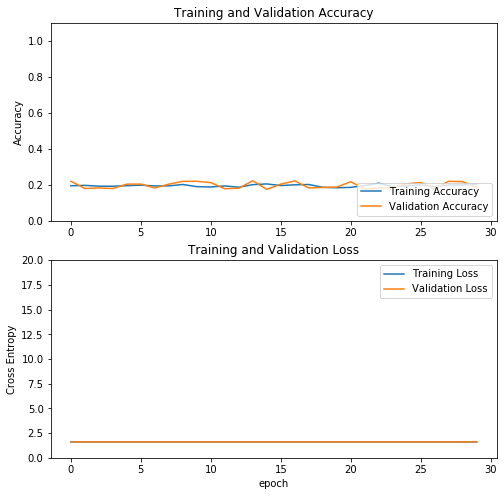

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.ylim([0,1.1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.ylim([0,20])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Testing model

In [43]:
from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader

INFO:tensorflow:Load image with size: 2671, num_label: 5, labels: 10, 100, 20, 200, 50.


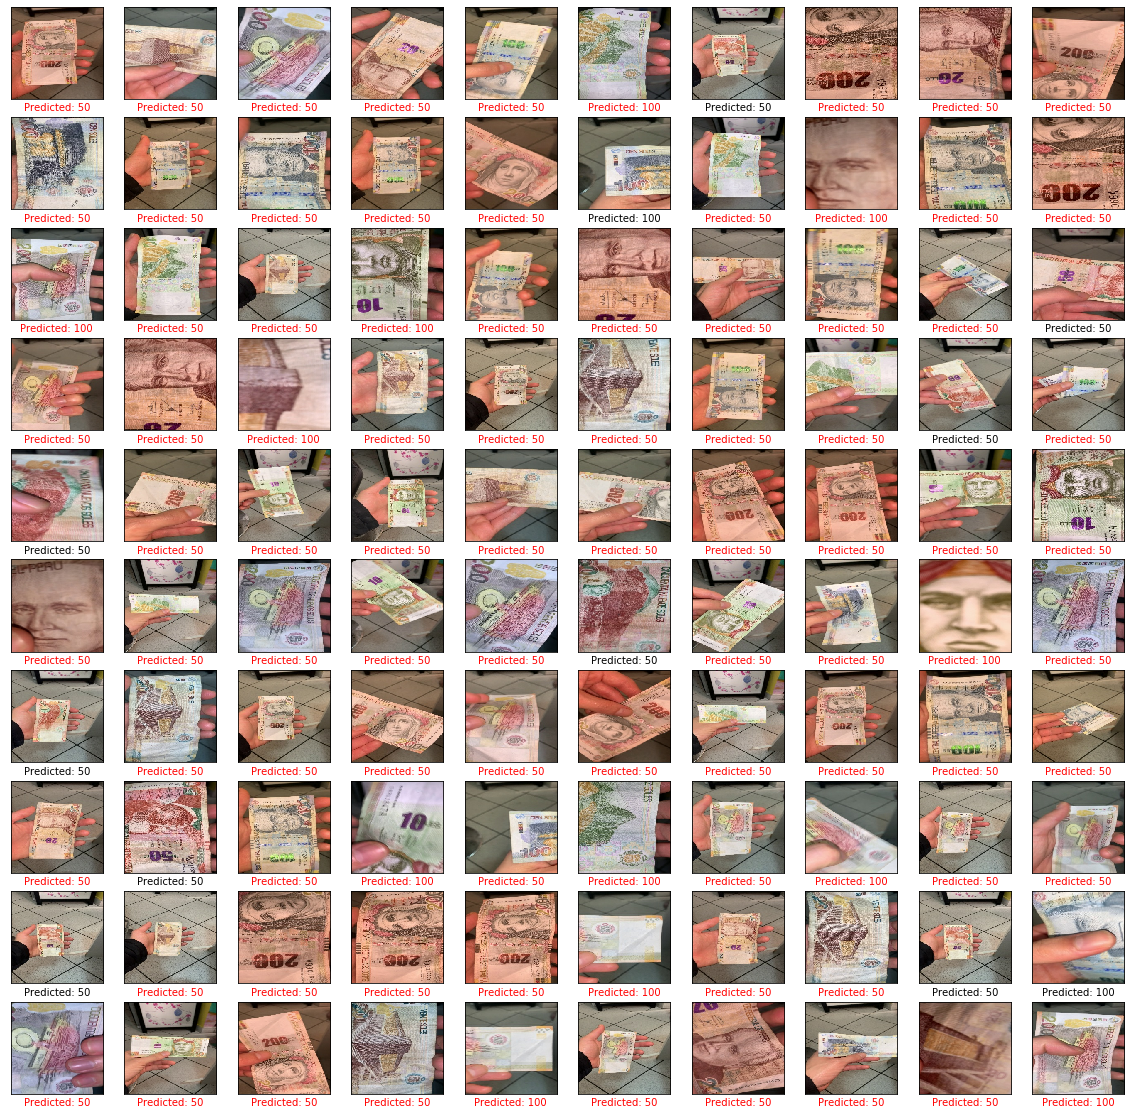

In [44]:
test_data = ImageClassifierDataLoader.from_folder(path_validation)

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(test_data.dataset.take(100)):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)
    
    # predict
    swapped = np.moveaxis(image, 0, 1)
    arr4d = np.expand_dims(swapped, 0)
    id_predict = np.argmax(model.predict(arr4d))
    predict_label = classNames[id_predict]
    
    color = get_label_color(predict_label, test_data.index_to_label[label.numpy()])
    #color = 'black'
    ax.xaxis.label.set_color(color)
    plt.xlabel('Predicted: %s' % predict_label)
plt.show()